# Face list Creation

In [81]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import requests

In [82]:
# Replace <Subscription Key> with your valid subscription key.
subscription_key = "84353ff0d5464f38b7bf6884434b380e"

In [83]:
face_list_url = 'https://eastasia.api.cognitive.microsoft.com/face/v1.0/facelists/{faceListId}'
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    "faceListId" : "sample_listlist1235123259"
    
}
data_list = {
    "name": "sample_list",
    "userData": "User-provided data attached to the face list."
}
response_list = requests.put(face_list_url,params=params,headers=headers, json=data_list)

In [84]:
response_list

<Response [200]>

# Face list add

In [67]:
face_list_url_add = 'https://eastasia.api.cognitive.microsoft.com/face/v1.0/facelists/{faceListId}/persistedFaces'

# Set image_url to the URL of an image that you want to analyze.
image_url1 = 'https://www.mercurynews.com/wp-content/uploads/2018/03/jolie_01.jpg'
image_url2 = 'https://bqhfpnuv66xza-cdn-storage.azureedge.net/cache/3/4/3/8/e/3/3438e3f6263482d9d83c12eec4fd38ec1b4157da.jpg'
image_url3 = 'https://www.usmagazine.com/wp-content/uploads/2018/09/brad-pitt-spending-time-with-kids.jpg'
image_url4 = 'https://news.artnet.com/app/news-upload/2015/07/brad-pitt-27072_getty_20080730182131-e1440597594775.jpg'

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params_face_add = {
    'faceListId' : 'sample_listlist1235123259'
}
data_add1 = {'url': image_url1}
data_add2 = {'url': image_url2}
data_add3 = {'url': image_url3}
response_add1 = requests.post(face_list_url_add, params=params_face_add, headers=headers, json=data_add1)
response_add2 = requests.post(face_list_url_add, params=params_face_add, headers=headers, json=data_add2)
response_add3 = requests.post(face_list_url_add, params=params_face_add, headers=headers, json=data_add3)
faces_add1 = response_add1.json()
faces_add2 = response_add2.json()
faces_add3 = response_add3.json()

In [68]:
file_id = []
file_id.append([image_url1,faces_add1['persistedFaceId']])
file_id.append([image_url2,faces_add2['persistedFaceId']])
file_id.append([image_url3,faces_add3['persistedFaceId']])

In [69]:
file_id

[['https://www.mercurynews.com/wp-content/uploads/2018/03/jolie_01.jpg',
  'a9a88c45-d109-4b27-a8da-090d486259f9'],
 ['https://bqhfpnuv66xza-cdn-storage.azureedge.net/cache/3/4/3/8/e/3/3438e3f6263482d9d83c12eec4fd38ec1b4157da.jpg',
  'efbef01b-4ae5-43ff-a891-a30d7513b5d0'],
 ['https://www.usmagazine.com/wp-content/uploads/2018/09/brad-pitt-spending-time-with-kids.jpg',
  '70f8abf3-fceb-4cbd-b9b7-f239bbf23b55']]

# Face similar

## 대상이미지

In [80]:
face_api_url = 'https://eastasia.api.cognitive.microsoft.com/face/v1.0/detect'
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,' +
    'emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}
data4 = {'url': 'http://106.10.59.210/sjt/j6.PNG'}
response4 = requests.post(face_api_url, params=params, headers=headers, json=data4)
faces4 = response4.json()
faces4[0]['faceId']

'7f86eef2-8eaf-4b04-8cc4-fc4602aa2586'

## 비교

In [71]:
face_list_url_compare = 'https://eastasia.api.cognitive.microsoft.com/face/v1.0/findsimilars'

# Set image_url to the URL of an image that you want to analyze.
image_url1 = 'https://www.mercurynews.com/wp-content/uploads/2018/03/jolie_01.jpg'
image_url2 = 'https://bqhfpnuv66xza-cdn-storage.azureedge.net/cache/3/4/3/8/e/3/3438e3f6263482d9d83c12eec4fd38ec1b4157da.jpg'
image_url3 = 'https://www.usmagazine.com/wp-content/uploads/2018/09/brad-pitt-spending-time-with-kids.jpg'
image_url4 = 'https://news.artnet.com/app/news-upload/2015/07/brad-pitt-27072_getty_20080730182131-e1440597594775.jpg'

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data_compare = {
    "faceId": faces4[0]['faceId'],
    "faceListId": "sample_listlist1235123259",
    "mode": "matchPerson"
}
response_compare = requests.post(face_list_url_compare, headers=headers, json=data_compare)
faces_compare = response_compare.json()

In [72]:
faces_compare

[{'confidence': 0.614352047,
  'persistedFaceId': '70f8abf3-fceb-4cbd-b9b7-f239bbf23b55'}]

# 출력

In [73]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO

In [74]:
target_url = ''
for i in file_id:
#     print(i[1])
    if i[1] == faces_compare[0]['persistedFaceId']:
        target_url = i[0]

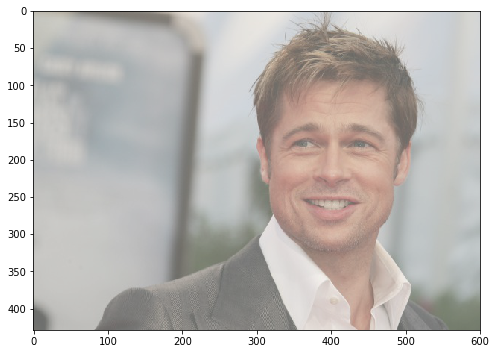

In [75]:
# Display the original image and overlay it with the face information.
image = Image.open(BytesIO(requests.get(image_url4).content))
plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=0.6)

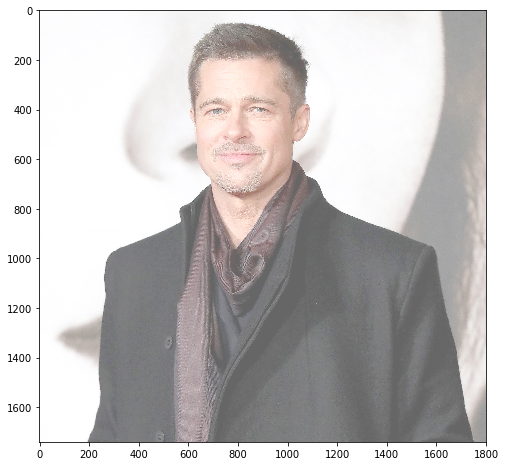

In [76]:
# Display the original image and overlay it with the face information.
image = Image.open(BytesIO(requests.get(target_url).content))
plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=0.6)

# Face 삭제

In [79]:
import http.client, urllib.request, urllib.parse, urllib.error, base64

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = urllib.parse.urlencode({
    "faceListId" : "sample_listlist1235123259"
})

try:
    conn = http.client.HTTPSConnection('eastasia.api.cognitive.microsoft.com')
    conn.request("DELETE", "/face/v1.0/facelists/{faceListId}?%s" % params, "{body}", headers)
    response = conn.getresponse()
    data = response.read()
    print(data)
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

b''
